<p><img style="padding: 0 15px; float: left;" src="Graphs/FTLogo300.jpg" alt="FT Crusader Logo" Width='140' Height= '250'/></p> 
<p> <h2> Saint Paul City Council Election Voting Workbook; 07/31/19</h2> <a name="tc"></a>
<p> <h3> By Frogtown Crusader (Abu Nayeem)</h3>

***Disclaimer:*** Technically, the Minnesota voting data is not publicly accessible, but is publicly available. 

### Set-up/ Load Data

Note: I cannot provide the raw Election and Voting Records Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import requests # library to handle requests
import folium
import seaborn as sns
import scipy.stats as stats #used to get correlation coefficient

# Load Election Data
df_election1 = pd.read_csv('Election01.txt')
df_election2 = pd.read_csv('Election02.txt')
df_election3 = pd.read_csv('Election03.txt')
df_election4 = pd.read_csv('Election04.txt')
df_election5 = pd.read_csv('Election05.txt')
df_election6 = pd.read_csv('Election06.txt')
df_election7 = pd.read_csv('Election07.txt')
df_election8 = pd.read_csv('Election08.txt')

#Combine Election the data
df_election_hal1= pd.concat([df_election1,df_election2,df_election3,df_election4])
df_election_hal2= pd.concat([df_election5,df_election6,df_election7,df_election8])

#Load Voter Data
#df_voter1 = pd.read_csv('Voter01.txt')
#df_voter2 = pd.read_csv('Voter02.txt')
#df_voter3 = pd.read_csv('Voter03.txt') -bugged
df_voter4 = pd.read_csv('Voter04.txt') #had desired county code: Saint Paul/ 
df_voter5 = pd.read_csv('Voter05.txt') #had desired county code: Saint Paul/ Minneapolis
#df_voter6 = pd.read_csv('Voter06.txt') -bugged
#df_voter7 = pd.read_csv('Voter07.txt')
#df_voter8 = pd.read_csv('Voter08.txt') -bugged

#Combine Voter Data
df_voter_ward1= pd.concat([df_voter4, df_voter5])

#Saint Paul Data
sp_voter= df_voter_ward1.query("City=='ST PAUL' and WardCode=1") #Only city of Saint Paul


FileNotFoundError: [Errno 2] File b'Election01.txt' does not exist: b'Election01.txt'

In [146]:
#View Columns
sp_voter.columns

Index(['VoterId', 'CountyCode', 'FirstName', 'MiddleName', 'LastName',
       'NameSuffix', 'HouseNumber', 'StreetName', 'UnitType', 'UnitNumber',
       'Address2', 'City', 'State', 'ZipCode', 'MailAddress', 'MailCity',
       'MailState', 'MailZipCode', 'PhoneNumber', 'RegistrationDate',
       'DOBYear', 'StateMcdCode', 'McdName', 'PrecinctCode', 'PrecinctName',
       'WardCode', 'School', 'SchSub', 'Judicial', 'Legislative', 'StateSen',
       'Congressional', 'Commissioner', 'Park', 'SoilWater', 'Hospital',
       'LegacyId', 'Age'],
      dtype='object')

#### Create Registered Voter Distribution

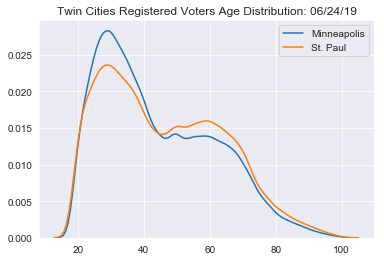

In [186]:
#Create an Age column
sp_voter['Age'] = 2019 - sp_voter['DOBYear'] 
minn_voter['Age'] = 2019 - minn_voter['DOBYear'] 


#Graphing using seaborn
sns.set_style("darkgrid") #white, white-grid, ticks
ax= sns.kdeplot(minn_voter.query('Age<101').Age, label='Minneapolis')
sns.kdeplot(sp_voter.query('Age<101').Age, label='St. Paul')

ax.set_title('Twin Cities Registered Voters Age Distribution: 06/24/19')

#Save Graph
figure = ax.get_figure()    
figure.savefig('RegisterVoterDistribution.png', dpi=400)


#### Plot Total Registered Voters

C:\Users\17189\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


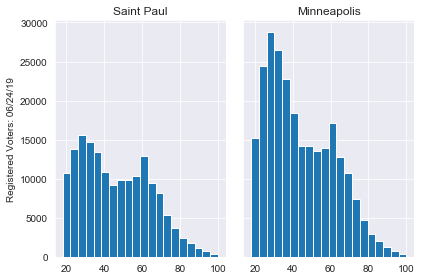

In [176]:

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
#axs[0].hist(com_Ward1['Age'], bins=20)
axs[0].set_ylabel('Registered Voters: 06/24/19')

axs[0].hist(sp_voter.query('Age<101').Age, bins=20)
axs[1].hist(minn_voter.query('Age<101').Age, bins=20)

axs[0].set_title('Saint Paul')
axs[1].set_title('Minneapolis')

figure = fig.get_figure()    
fig.savefig('RegisterVotersCount.png', dpi=400)

#### Plot Ward 3 Age Distribution

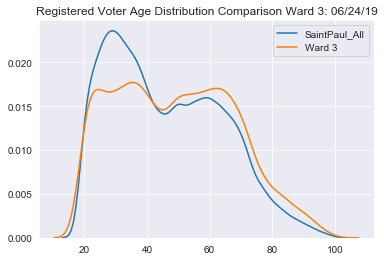

In [424]:
#

ax=sns.kdeplot(sp_voter.query('Age<101').Age, label='SaintPaul_All')
sns.kdeplot(sp_voter.query('WardCode==3 and Age<101').Age, label='Ward 3')

ax.set_title('Registered Voter Age Distribution Comparison Ward 3: 06/24/19')

#Save Graph
figure = ax.get_figure()    
figure.savefig('AgeDistributionSP3.png', dpi=400)


#### Ward/ Voter Info

In [191]:
# Find total current registered Voters
sp_voter['WardCode'].value_counts()

3.0    29145
2.0    26735
4.0    26475
1.0    21699
7.0    20584
5.0    19933
6.0    19431
Name: WardCode, dtype: int64

In [192]:
#Find Adjusted Total in 2016 Election
sp_voter.query('Age>20').WardCode.value_counts()

3.0    28144
2.0    26279
4.0    25400
1.0    21118
7.0    20041
5.0    19418
6.0    18856
Name: WardCode, dtype: int64

In [193]:
#Find Adjusted Total in 2015 Election
sp_voter.query('Age>21').WardCode.value_counts()

3.0    27612
2.0    26001
4.0    24715
1.0    20737
7.0    19693
5.0    19074
6.0    18509
Name: WardCode, dtype: int64

In [3]:
# Voter Info COlumns
df_voter_ward1.columns

Index(['VoterId', 'CountyCode', 'FirstName', 'MiddleName', 'LastName',
       'NameSuffix', 'HouseNumber', 'StreetName', 'UnitType', 'UnitNumber',
       'Address2', 'City', 'State', 'ZipCode', 'MailAddress', 'MailCity',
       'MailState', 'MailZipCode', 'PhoneNumber', 'RegistrationDate',
       'DOBYear', 'StateMcdCode', 'McdName', 'PrecinctCode', 'PrecinctName',
       'WardCode', 'School', 'SchSub', 'Judicial', 'Legislative', 'StateSen',
       'Congressional', 'Commissioner', 'Park', 'SoilWater', 'Hospital',
       'LegacyId'],
      dtype='object')

### Prep Election Records

In [6]:
# Election Info Columns
df_election_hal2.columns

Index(['VoterId', 'ElectionDate', 'ElectionDescription', 'VotingMethod'], dtype='object')

I choose to work with smaller column dataset first computation will increase for larger dataset and election dataset needs to be condensed to a single line to be more easily accessible.

In [9]:
#Get the "Year" variable from election date. 
#NOTE: My normal method to converting datetime was too computational for my computer to handle. I commented it out

#df_election_all['DateTime']= pd.to_datetime(df_election_all['ElectionDate']) # Create new column called DateTime
#df_election_all['Year']= df_election_all['DateTime'].dt.year #create year column

df_election_hal1['Year'] = df_election_hal1['ElectionDate'].str.strip().str[6:]
df_election_hal1.Year = df_election_hal1.Year.astype(int) #convert to integer
df_election_hal1= df_election_hal1.query('Year in (2011,2015,2016,2017,2018)')

In [10]:
df_election_hal2['Year'] = df_election_hal2['ElectionDate'].str.strip().str[6:]
df_election_hal2.Year = df_election_hal2.Year.astype(int) #convert to integer
df_election_hal2= df_election_hal2.query('Year in (2011,2015,2016,2017,2018)')

In [11]:
#COmbine
df_election_all= pd.concat([df_election_hal1, df_election_hal2])

In [194]:
#select primary key from Voter table
Voter_ID= sp_voter.iloc[:,[0,1]]

#Specify Primary Key and keep only the matches
df_SP_raw=df_election_all.set_index('VoterId').join(Voter_ID.set_index('VoterId'))

In [16]:
# Testing Event Values
#Ward1_15= df_election_ward1.query("Year==2015")
#Ward1_15['ElectionDescription'].value_counts()


In [411]:
# I already selected the events I'm interested
df_SP= df_SP_raw.query('ElectionDescription in ("11/07/2017 - MUNICIPAL GENERAL","11/08/2016 - STATE GENERAL","11/03/2015 - MUNICIPAL GENERAL","11/06/2018 - STATE GENERAL")')

#Create a Count Variable (participation from 2015 outward)
df_SP['Count'] = df_SP['Year'].apply(lambda x: 0 if x==2011  else 1)

df_SP['SP_Vote15'] = df_SP['ElectionDescription'].apply(lambda x: 1 if (x=='11/03/2015 - MUNICIPAL GENERAL')  else 0)
df_SP['SP_Vote16'] = df_SP['ElectionDescription'].apply(lambda x: 1 if (x=='11/08/2016 - STATE GENERAL')  else 0)
df_SP['SP_Vote17'] = df_SP['ElectionDescription'].apply(lambda x: 1 if (x=='11/07/2017 - MUNICIPAL GENERAL')  else 0)
df_SP['SP_Vote18'] = df_SP['ElectionDescription'].apply(lambda x: 1 if (x=='11/06/2018 - STATE GENERAL')  else 0)

#Aggregate the data
Features= ['SP_Vote15','SP_Vote16','SP_Vote17','SP_Vote18']
df_SP= df_SP[Features].groupby(['VoterId']).sum()

#Combine with voter data
df_SP=df_SP.reset_index()
com_SP=sp_voter.set_index('VoterId').join(df_SP.set_index('VoterId'))

#Correct the Precinct Name File so connect with JSON file for Mapping
com_SP.PrecinctName=com_SP.PrecinctName.str.replace('ST. PAUL', 'Saint Paul')
com_SP.PrecinctName=com_SP.PrecinctName.str.replace('-0', '-')



#Repeat Steps with Minneapolis
#select primary key from Voter table
MVoter_ID= minn_voter.iloc[:,[0,1]]

#Specify Primary Key and keep only the matches
df_minn=df_election_all.set_index('VoterId').join(MVoter_ID.set_index('VoterId'))

# I already selected the events I'm interested
df_M1= df_minn.query('ElectionDescription in ("11/07/2017 - MUNICIPAL GENERAL")')

#Create a Count Variable (participation from 2015 outward)
df_M1['Count'] = df_M1['Year'].apply(lambda x: 0 if x==2011  else 1)

#set Value for 2015 election
df_M1['Mpls_Vote17'] = df_M1['ElectionDescription'].apply(lambda x: 1 if (x=='11/07/2017 - MUNICIPAL GENERAL')  else 0)

Features= ['Mpls_Vote17','Count']
df_M1= df_M1[Features].groupby(['VoterId']).sum()

df_M1=df_M1.reset_index()
com_Mpls=minn_voter.set_index('VoterId').join(df_M1.set_index('VoterId'))



#### Plot Voting Trends

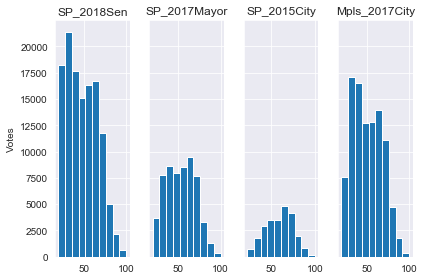

In [412]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#com_SP['Age'] = 2019 - com_SP['DOBYear'] 
#com_Mpls['Age'] = 2019 - com_Mpls['DOBYear'] 


fig, axs = plt.subplots(1, 4, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
#axs[0].hist(com_Ward1['Age'], bins=20)
axs[0].set_ylabel('Votes')

axs[0].hist(com_SP.query('SP_Vote18>0 and Age<101').Age, bins=10)
axs[1].hist(com_SP.query('SP_Vote17>0 and Age<101').Age, bins=10)
axs[2].hist(com_SP.query('SP_Vote15>0 and Age<101').Age, bins=10)
axs[3].hist(com_Mpls.query('Mpls_Vote17>0 and Age<101').Age, bins=10)


axs[0].set_title('SP_2018Sen')
axs[1].set_title('SP_2017Mayor')
axs[2].set_title('SP_2015City')
axs[3].set_title('Mpls_2017City')


figure = fig.get_figure()    
fig.savefig('ElectionVoteCount.png', dpi=400)

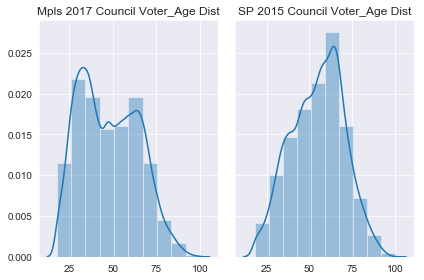

In [441]:
import matplotlib.pyplot as plt
from pylab import savefig

#Correcting for Age
Features= ['Age','Mpls_Vote17']
Features1= ['Age','SP_Vote15']

m=com_Mpls[Features]
m['Age']= m['Age'] -2
s=com_SP[Features1]
s['Age']= s['Age'] -4

#Graphing
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

bg= sns.distplot(m.query('Mpls_Vote17>0 and Age<101').Age, bins=10, ax=axs[0], axlabel=False)
sns.distplot(s.query('SP_Vote15>0 and Age<101').Age, bins=10, ax=axs[1], axlabel=False)
#axs[3].hist(com_Mpls.query('Mpls_Vote17>0 and Age<101').Age, bins=20)

#bg= sns.distplot(com_Mpls.query('Mpls_Vote17>0').Age, bins=10, ax=ax1, axlabel=False)#, kde=False)

axs[0].set_title('Mpls 2017 Council Voter_Age Dist')
axs[1].set_title('SP 2015 Council Voter_Age Dist')

#com_Mpls.Age.value_counts()

figure = bg.get_figure()    
figure.savefig('Twin_Cities_Voter_Age_Distribution.png', dpi=400)

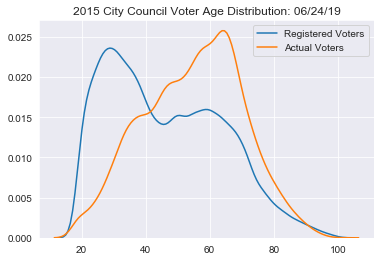

In [444]:
#Create Intro Graphs

import matplotlib.pyplot as plt
from pylab import savefig

#Correcting for Age
Features1= ['Age','SP_Vote15']
s=com_SP[Features1]
s['Age']= s['Age'] -4


#Graphing

ax=sns.kdeplot(sp_voter.query('Age<101').Age, label='Registered Voters')
sns.distplot(s.query('SP_Vote15>0 and Age<101').Age, bins=10, label='Actual Voters', hist=False)

ax.set_title('2015 City Council Voter Age Distribution: 06/24/19')
ax.set(xlabel='')

figure = ax.get_figure()    
figure.savefig('CityCouncilAgeDistribution.png', dpi=400)

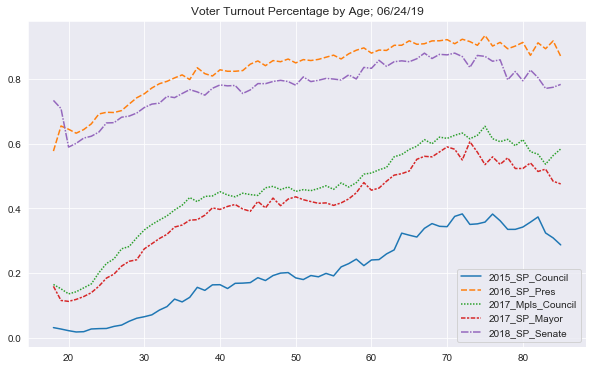

In [440]:
com_SP['Counting']=1
com_Mpls['Counting']=1

Features= ['Age','SP_Vote15','Counting']
SP_15= com_SP[Features].groupby(['Age']).sum()
SP_15['2015_SP_Council'] = SP_15.SP_Vote15 / SP_15.Counting
SP_15=SP_15.reset_index()
SP_15['Age']= SP_15['Age'] -4 
SP_15= SP_15.query('Age<86 and Age>17')
f= ['Age','2015_SP_Council']
SP_15= SP_15[f]

Features= ['Age','SP_Vote16','Counting']
SP_16= com_SP[Features].groupby(['Age']).sum()
SP_16['2016_SP_Pres'] = SP_16.SP_Vote16 / SP_16.Counting
SP_16=SP_16.reset_index()
SP_16['Age']= SP_16['Age'] -3 
SP_16= SP_16.query('Age<86 and Age>17')
f= ['Age','2016_SP_Pres']
SP_16= SP_16[f]

Features= ['Age','SP_Vote17','Counting']
SP_17= com_SP[Features].groupby(['Age']).sum()
SP_17['2017_SP_Mayor'] = SP_17.SP_Vote17 / SP_17.Counting
SP_17=SP_17.reset_index()
SP_17['Age']= SP_17['Age'] -2 
SP_17= SP_17.query('Age<86 and Age>17')
f= ['Age','2017_SP_Mayor']
SP_17= SP_17[f]

Features= ['Age','SP_Vote18','Counting']
SP_18= com_SP[Features].groupby(['Age']).sum()
SP_18['2018_SP_Senate'] = SP_18.SP_Vote18 / SP_18.Counting
SP_18=SP_18.reset_index()
SP_18['Age']= SP_18['Age'] -1
SP_18= SP_18.query('Age<86 and Age>17')
f= ['Age','2018_SP_Senate']
SP_18= SP_18[f]

#Minneapolis
Features= ['Age','Mpls_Vote17','Counting']
Mpls_17= com_Mpls[Features].groupby(['Age']).sum()
Mpls_17['2017_Mpls_Council'] = Mpls_17.Mpls_Vote17 / Mpls_17.Counting
Mpls_17=Mpls_17.reset_index()
Mpls_17['Age']= Mpls_17['Age'] -2 
Mpls_17= Mpls_17.query('Age<86 and Age>17')
f= ['Age','2017_Mpls_Council']
Mpls_17= Mpls_17[f]

# Create Single Table
a=SP_15.set_index('Age').join(SP_16.set_index('Age'))
a=a.reset_index()
b=a.set_index('Age').join(SP_17.set_index('Age'))
b=b.reset_index()
c=b.set_index('Age').join(Mpls_17.set_index('Age'))
c=c.reset_index()
d=c.set_index('Age').join(SP_18.set_index('Age'))


# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Voter Turnout Percentage by Age; 06/24/19")

col= ['2015_SP_Council', '2016_SP_Pres', '2017_Mpls_Council',  '2017_SP_Mayor','2018_SP_Senate']

bg=sns.lineplot(data=d[col])

# Add label for horizontal axis
plt.xlabel("")

figure = bg.get_figure() 
figure.savefig('VoterTurnoutPercentage.png', dpi=400)


### Ward/Young Voter Data

In [420]:
# 2015 Saint Paul City Council Numbers Setup

com_SP['Counting']=1

#Setup For all Age
Features= ['Age','WardCode','SP_Vote15','Counting']
E_15= com_SP[Features].groupby(['WardCode','Age']).sum()
E_15=E_15.reset_index()
E_15['Age']= E_15['Age'] -4 
E_15= E_15.query('Age>17')
E_15_All= E_15.groupby(['WardCode']).sum()
E_15_All['Vote%'] = round(E_15_All.SP_Vote15 / E_15_All.Counting, 4) *100
E_15_All.drop(['Age'], axis=1, inplace=True)
E_15_All.columns= ['Total_Votes','Total_Registered','Total_Voting%']
E_15_All=E_15_All.reset_index()


#Setup for youth [18-20]
E_15_Young= E_15.query('Age<21')
E_15_Young= E_15_Young.groupby(['WardCode']).sum()
E_15_Young['YouthVote%'] = round(E_15_Young.SP_Vote15 / E_15_Young.Counting, 4) *100
E_15_Young.drop(['Age'], axis=1, inplace=True)
E_15_Young.columns= ['Youth_Votes','Youth_Registered','Youth_Voting%']
E_15_Young=E_15_Young.reset_index()
E_15_Young['YouthVote%_by_Total']= round(E_15_Young.Youth_Votes/ E_15_All.Total_Votes, 4) *100 

E_15_All=E_15_All.set_index('WardCode').join(E_15_Young.set_index('WardCode'))

#Total Column

Features= ['Age','SP_Vote15','Counting']
El= com_SP[Features].groupby(['Age']).sum()
El=El.reset_index()
El['Age']= El['Age'] -4 
El= El.query('Age>17')
El['WardCode']= 'All'
Ela= El.groupby(['WardCode']).sum()
Ela['Vote%'] = round(Ela.SP_Vote15 / Ela.Counting, 4) *100
Ela.drop(['Age'], axis=1, inplace=True)
Ela.columns= ['Total_Votes','Total_Registered','Total_Voting%']
Ela=Ela.reset_index()
Ela

Ely= El.query('Age<21')
Ely= Ely.groupby(['WardCode']).sum()
Ely['Vote%'] = round(Ely.SP_Vote15 / Ely.Counting, 4) *100
Ely.drop(['Age'], axis=1, inplace=True)
Ely.columns= ['Youth_Votes','Youth_Registered','Youth_Voting%']
Ely=Ely.reset_index()
Ely['YouthVote%_by_Total']= round(Ely.Youth_Votes/ Ela.Total_Votes, 4) *100 
Ely

b=Ela.set_index('WardCode').join(Ely.set_index('WardCode'))

#Final Table
Fin=E_15_All.append(b)
E_15_All= E_15_All.reset_index()

Fin


,Total_Votes,Total_Registered,Total_Voting%,Youth_Votes,Youth_Registered,Youth_Voting%,YouthVote%_by_Total
WardCode,,,,,,,
1.0,2637.0,20737,12.72,19.0,1231,1.54,0.72
2.0,4884.0,26001,18.78,37.0,1232,3.00,0.76
3.0,4939.0,27612,17.89,67.0,1547,4.33,1.36
4.0,4905.0,24715,19.85,47.0,2160,2.18,0.96
5.0,3396.0,19074,17.80,34.0,1100,3.09,1.00
6.0,1931.0,18509,10.43,25.0,1100,2.27,1.29
7.0,1780.0,19693,9.04,19.0,1150,1.65,1.07
All,24472.0,156341,15.65,248.0,9520,2.61,1.01


In [421]:
Fin= Fin.reset_index()

#save table
Fin.to_csv(r'Data/SaintPaul_2015_Ward_YouthVoting_06-24-19.csv',index=False)

In [423]:
# 2016 Saint Paul Presidential Numbers Setup

com_SP['Counting']=1

#Setup For all Age
Features= ['Age','WardCode','SP_Vote16','Counting']
E_16= com_SP[Features].groupby(['WardCode','Age']).sum()
E_16=E_16.reset_index()
E_16['Age']= E_16['Age'] -3
E_16= E_16.query('Age>17')
E_16_All= E_16.groupby(['WardCode']).sum()
E_16_All['Vote%'] = round(E_16_All.SP_Vote16 / E_16_All.Counting, 4) *100
E_16_All.drop(['Age'], axis=1, inplace=True)
E_16_All.columns= ['Total_Votes','Total_Registered','Total_Voting%']
E_16_All=E_16_All.reset_index()


#Setup for youth [18-20]
E_16_Young= E_16.query('Age<21')
E_16_Young= E_16_Young.groupby(['WardCode']).sum()
E_16_Young['YouthVote%'] = round(E_16_Young.SP_Vote16 / E_16_Young.Counting, 4) *100
E_16_Young.drop(['Age'], axis=1, inplace=True)
E_16_Young.columns= ['Youth_Votes','Youth_Registered','Youth_Voting%']
E_16_Young=E_16_Young.reset_index()
E_16_Young['YouthVote%_by_Total']= round(E_16_Young.Youth_Votes/ E_16_All.Total_Votes, 4) *100 


E_16_All=E_16_All.set_index('WardCode').join(E_16_Young.set_index('WardCode'))

#Total Column

Features= ['Age','SP_Vote16','Counting']
El= com_SP[Features].groupby(['Age']).sum()
El=El.reset_index()
El['Age']= El['Age'] -3 
El= El.query('Age>17')
El['WardCode']= 'All'
Ela= El.groupby(['WardCode']).sum()
Ela['Vote%'] = round(Ela.SP_Vote16 / Ela.Counting, 4) *100
Ela.drop(['Age'], axis=1, inplace=True)
Ela.columns= ['Total_Votes','Total_Registered','Total_Voting%']
Ela=Ela.reset_index()
Ela

Ely= El.query('Age<21')
Ely= Ely.groupby(['WardCode']).sum()
Ely['Vote%'] = round(Ely.SP_Vote16 / Ely.Counting, 4) *100
Ely.drop(['Age'], axis=1, inplace=True)
Ely.columns= ['Youth_Votes','Youth_Registered','Youth_Voting%']
Ely=Ely.reset_index()
Ely['YouthVote%_by_Total']= round(Ely.Youth_Votes/ Ela.Total_Votes, 4) *100 
Ely

b=Ela.set_index('WardCode').join(Ely.set_index('WardCode'))

#Final Table
Tin=E_16_All.append(b)

Tin

,Total_Votes,Total_Registered,Total_Voting%,Youth_Votes,Youth_Registered,Youth_Voting%,YouthVote%_by_Total
WardCode,,,,,,,
1.0,16324.0,21118,77.30,687.0,1158,59.33,4.21
2.0,21190.0,26279,80.63,614.0,1024,59.96,2.90
3.0,24678.0,28144,87.68,1001.0,1558,64.25,4.06
4.0,21323.0,25400,83.95,1529.0,2153,71.02,7.17
5.0,14971.0,19418,77.10,645.0,1084,59.50,4.31
6.0,14415.0,18856,76.45,626.0,1069,58.56,4.34
7.0,15606.0,20041,77.87,637.0,1105,57.65,4.08
All,128507.0,159256,80.69,5739.0,9151,62.71,4.47


In [422]:
Tin= Tin.reset_index()

Tin.to_csv(r'Data/SaintPaul_2016_Ward_YouthVoting_06-24-19.csv',index=False)

### Precinct Fragmentation

This code can be used to determine fragmentation in other legislative districts with a few tweeks

In [403]:

#Ward Aggregate Info
Features= ['WardCode','Total_Votes','Total_Registered']
PW_15=E_15_All[Features]
PW_15.columns= ['WardCode','Total_WardVotes','Total_WardRegistered']


#By Precinct

com_SP['Counting']=1

#Setup For all Age
Features= ['Age','WardCode','PrecinctName','SP_Vote15','Counting']
P_15= com_SP[Features].query('Age>21').groupby(['WardCode','PrecinctName']).sum()
P_15=P_15.reset_index()
P_15['Voting%'] = round(P_15.SP_Vote15 / P_15.Counting, 4) *100

#Join the Ward Table
P_15=P_15.set_index('WardCode').join(PW_15.set_index('WardCode'))

#Determine Weight Variables/other Cleaning
P_15['Projected_Weight']= round(P_15.Counting / P_15.Total_WardRegistered, 4) *100
P_15['Actual_Weight']= round(P_15.SP_Vote15 / P_15.Total_WardVotes, 4) *100
P_15['Representation']= P_15.Actual_Weight - P_15.Projected_Weight
#P_15['StateMcdCode']= 140
P_15.drop(['Age'], axis=1, inplace=True)
P_15=P_15.reset_index()

#Rename columns
P_15.columns= ['WardCode','PrecinctName', 'Precinct_Vote', 'Precinct_Register', 'Voting%','Total_WardVotes', 'Total_WardRegistered', 'Projected_Weight','Actual_Weight', 'Representation']

#Save file as it can be used as datasource and people can have access
P_15.to_csv(r'Data/SaintPaul_PrecinctAnalysis_06-24-19.csv',index=False)


In [2]:
# Set up Mapping

import folium
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import style
import shapely as sh
import numpy as np

#Note the shape file was editted to contain only saint paul precincts


def map_2015_SP_CityCouncilRepresentation_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_15 
        A='City Council'
        zo= 12
    else: 
        B= P_15[(P_15['WardCode'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    #Set up Variable Zoom Locations
    data = [[0, [44.953930, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 
  
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['PrecinctName','Representation'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2015 Saint Paul ' + A +' Precinct Representation: 06/24/19',
        highlight= True
    )
    folium.LayerControl().add_to(SP_map)
                             
    # display map
    return SP_map


In [406]:
Features= ['WardCode','PrecinctName', 'Precinct_Vote', 'Precinct_Register', 'Voting%', 'Projected_Weight','Actual_Weight', 'Representation']
P_15[Features]

,WardCode,PrecinctName,Precinct_Vote,Precinct_Register,Voting%,Projected_Weight,Actual_Weight,Representation
0,1.0,Saint Paul W-1 P-1,279.0,1126,24.78,5.43,10.58,5.15
1,1.0,Saint Paul W-1 P-10,35.0,442,7.92,2.13,1.33,-0.80
2,1.0,Saint Paul W-1 P-11,123.0,1067,11.53,5.15,4.66,-0.49
3,1.0,Saint Paul W-1 P-12,66.0,328,20.12,1.58,2.50,0.92
4,1.0,Saint Paul W-1 P-13,175.0,1135,15.42,5.47,6.64,1.17
5,1.0,Saint Paul W-1 P-14,126.0,925,13.62,4.46,4.78,0.32
6,1.0,Saint Paul W-1 P-15,37.0,700,5.29,3.38,1.40,-1.98
7,1.0,Saint Paul W-1 P-16,31.0,235,13.19,1.13,1.18,0.05
8,1.0,Saint Paul W-1 P-2,268.0,2046,13.10,9.87,10.16,0.29
9,1.0,Saint Paul W-1 P-3,174.0,1792,9.71,8.64,6.60,-2.04


In [3]:
#Sample Map; Select the ward number in paranthesis to specify it; Default is all

map_2015_SP_CityCouncilRepresentation_byPrecinct()

NameError: name 'P_15' is not defined